#### Student Name:
Elad Prager
---


#### Student ID:
200865780

## Overview 
### Due Nov 30th

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be turned in individually, you can collaborate with one classmate.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook.

Upload your completed assignment on moodle.

In [1]:
# If you're collaboraing with a classmate, please fill in the following:

collaboration = {
    "200865780" : "201050135"
}

In [2]:
! pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Understanding Sound 

For this portion of the assignment, you will load your unique wav file from 
https://drive.google.com/drive/folders/1hgIWnJ_AHRPMvetS8cpXm0DipIqADqhc?usp=share_link 

Your wav file is your studentId.wav

Your task is to listen and examine your file and try to recreate it with sin waves.

Hints :)
- The length of each frequency used is 3-7 seconds
- Each frequency is set to start at exactly the start of a second
- The amplitudes used are [0.5, 1, 1.5, 2, 2.5]
- Think of all we learned in class (sample rate, wave forms, adding waves, spectrogram, etc.) 
- These may be helpful for you
 - http://librosa.org/doc/0.8.1/generated/librosa.display.waveplot.html
  - https://librosa.org/doc/main/generated/librosa.stft.html

In [3]:
import librosa
import librosa.display as dsp

from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

### Modify the line below with your WAV file:
y, sample_rate = librosa.load("/content/200865780.wav") 

Audio(data=y,rate=sample_rate)

##### Question 1 [20 points]
Reconstruct your wav file using sin waves. Use whatever approach you can think of. Google is your friend if you need it. 

Make sure to play your version and also show the difference between the original and your reconstruction.

## Visualize the original signal

In [4]:
sample_rate

22050

In [5]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8, 2)

In [6]:
def normalize_signal(data):
  normalize_Factor = max(max(data),-min(data))
  data = data / normalize_Factor
  return data

y = normalize_signal(y)

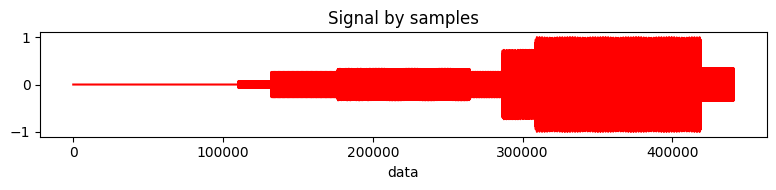

In [7]:
plt.title("Signal by samples")
plt.plot(y[:], 'r')
plt.xlabel("data")
plt.tight_layout()
plt.show()

In [8]:
seconds = 20
time = np.arange(y.shape[0]) / y.shape[0] * seconds

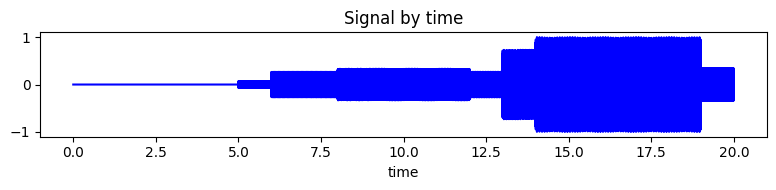

In [9]:
plt.title("Signal by time")
plt.plot(time, y[:], 'b')
plt.xlabel("time")
plt.tight_layout()
plt.show()

## Collect the original amplitudes and frequencies

In [10]:
def collect_amplitudes_frequencies(data, sr):
  frequencies_amplitudes = []
  for i in range(seconds):
    frequency_amplitude = {}
    signal = data[sr*i:sr*(i+1)]
    fft_spectrum = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(signal.size, d=1./sr)
    
    for i,a in enumerate(np.abs(fft_spectrum)):
      if a > 5:
        frequency_amplitude[freq[i]] = a
    if frequency_amplitude == {}:
      frequency_amplitude[0.0] = 0.0

    frequencies_amplitudes.append(frequency_amplitude)
  return frequencies_amplitudes

In [11]:
frequencies_amplitudes = collect_amplitudes_frequencies(y, sample_rate)
frequencies_amplitudes

[{0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {3980.0: 735.598584788818},
 {2503.0: 2206.7957550234632, 3980.0: 735.5985847485988},
 {2503.0: 2206.7957550213623, 3980.0: 735.5985847491227},
 {753.0: 735.5985834436115,
  2503.0: 2206.795753188841,
  3980.0: 735.5985846078777},
 {687.0: 735.5985841096634,
  753.0: 735.5985849294825,
  2503.0: 2206.7957551251993},
 {687.0: 735.5985841091717,
  753.0: 735.5985849352141,
  2503.0: 2206.795755124689},
 {687.0: 735.5985841145073,
  753.0: 735.5985849306546,
  2503.0: 2206.7957551209056},
 {687.0: 735.5985856209011, 2503.0: 2206.7957541620644},
 {687.0: 735.598585803684,
  3811.0: 3677.992924653279,
  3837.0: 3677.9929238172213},
 {3552.0: 3677.9929239524627,
  3811.0: 3677.9929204257987,
  3837.0: 3677.992923063169},
 {3552.0: 3677.9929240276188,
  3811.0: 3677.99292047325,
  3837.0: 3677.9929231213796},
 {3552.0: 3677.9929239598114,
  3811.0: 3677.9929204197815,
  3837.0: 3677.9929231054707},
 {3552.0: 3677.9929240184374,

## Reconstruct the original signal

In [12]:
from scipy.io.wavfile import write

def get_window(start, length, sample_rate, amplitude):
  samples = seconds*sample_rate
  o = np.ones(samples)
  z = np.zeros(samples)
  st = start*sample_rate
  ln = length*sample_rate
  z[st:st+ln] = o[st:st+ln]
  z *= amplitude
  return z, start, length

def gen_audio(freq, length, sample_rate):
  Nsamples = seconds*sample_rate
  x = np.sin(2*np.pi*freq*np.arange(Nsamples)/sample_rate)
  return x

def make_mixture():
  fs = []

  length = 1
  freq = 0
  sample_rate=22050
  amplitude = 0
  start = 0

  frequencies = list(frequencies_amplitudes[0].keys())
  amplitudes = list(frequencies_amplitudes[0].values())
  freq = frequencies[0]
  amplitude = amplitudes[0]

  win, st, ln = get_window(start, length, sample_rate, amplitude)
  x = gen_audio(freq, length, sample_rate)*win
  fs.append((freq, st, ln))

  for i in range(1,len(frequencies_amplitudes)):
    frequencies = list(frequencies_amplitudes[i].keys())
    amplitudes = list(frequencies_amplitudes[i].values())
    start += 1

    for j in range(len(frequencies)):
      freq = frequencies[j]
      amplitude = amplitudes[j]
      
      win, st, ln = get_window(start, length, sample_rate, amplitude)
      x += gen_audio(freq, length, sample_rate)*win
      fs.append((freq,st,ln))
  return x, fs

In [13]:
x, fs = make_mixture()

In [14]:
x = normalize_signal(x)

## Play the reconstruct audio

In [15]:
Audio(data=x,rate=sample_rate)

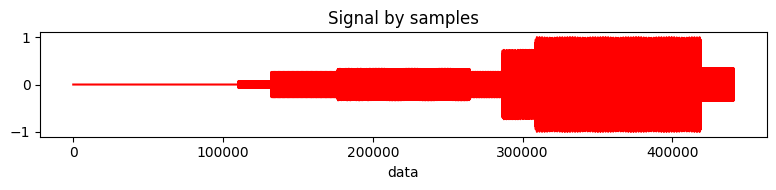

In [16]:
plt.title("Signal by samples")
plt.plot(x[:], 'r')
plt.xlabel("data")
plt.tight_layout()
plt.show()

## Difference between reconstructed to original audio

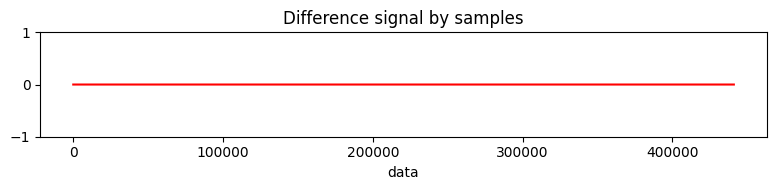

In [17]:
z = y - x

plt.title("Difference signal by samples")
plt.plot(z[:], 'r')
plt.xlabel("data")
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

##### Question 2 [10 points]
Explain the logic you used to reconstruct the wav file. How did you find the frequencies? How did you figure out where they start and end?
How well did you do? 

**We were given that each frequency is set to start at exactly the start of a second (an integer). Therefore, we gathered the amplitudes and the frequencies for each second using fourier transformation, and reconstruct the audio accordingly using sine waves and a constant window of one.**

**It is important to note that when several frequencies were activated in parallel, we took this into account, we've generated several signals accordingly, and by applying summation we've produce the exact wave.**

**As we could see, the difference between the reconstructed signal to the original signal is negligible, thus we can say that we've successfully recreated the orginal signal with sin waves**


##### Question 3 [20 points]
Show some of your work on how you reconstructed the wav file. Show some actual code you used in understanding what the file is composed of? Visuals are nice.

## Visualize Signal and Frequency

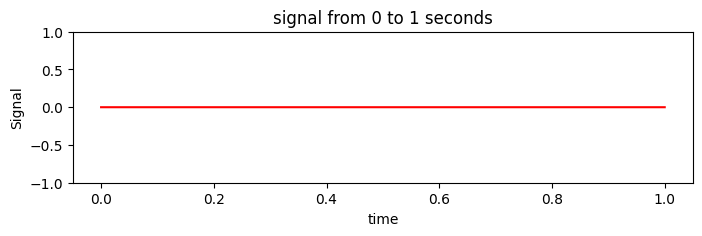

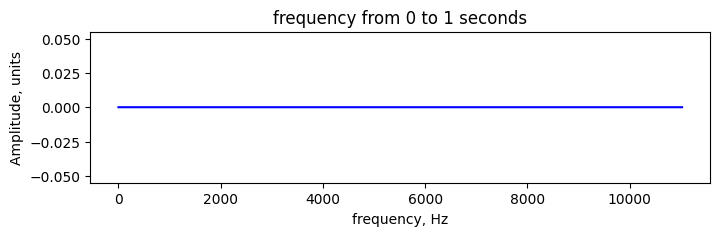



______________________________________________________________________________________________




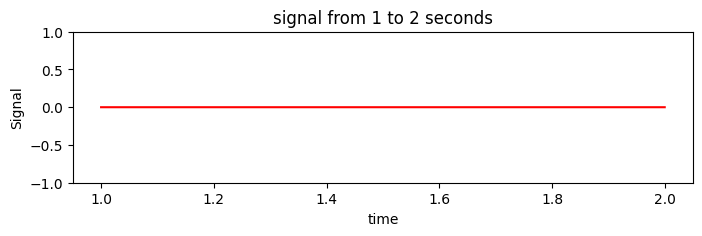

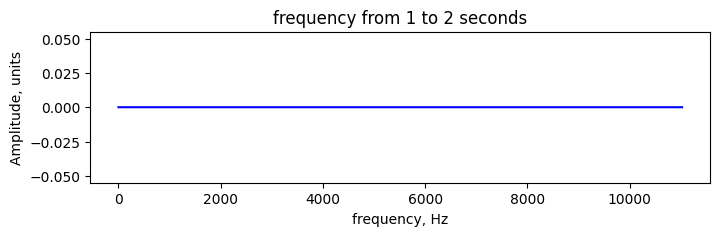



______________________________________________________________________________________________




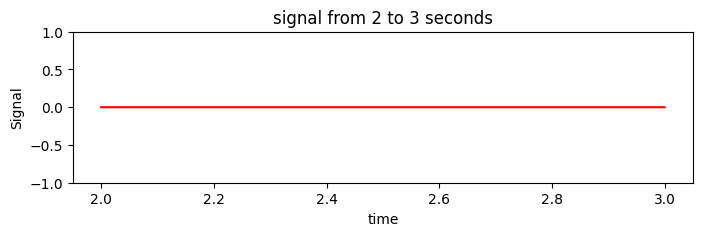

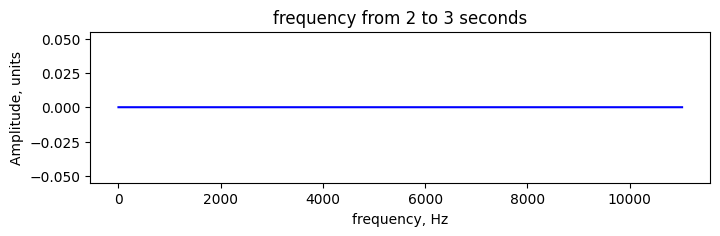



______________________________________________________________________________________________




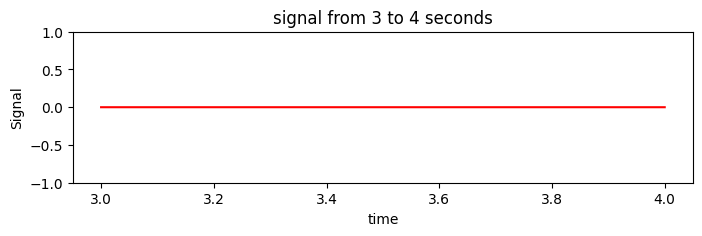

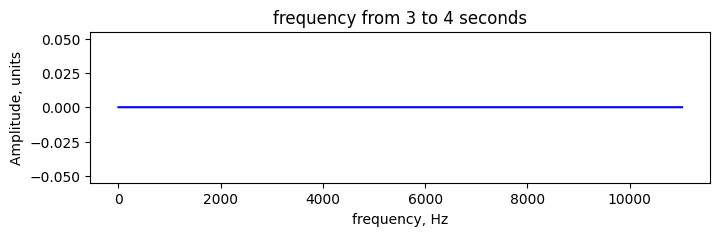



______________________________________________________________________________________________




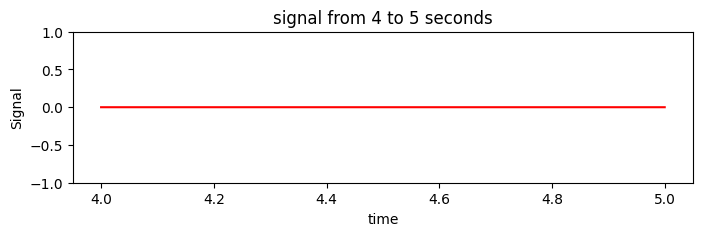

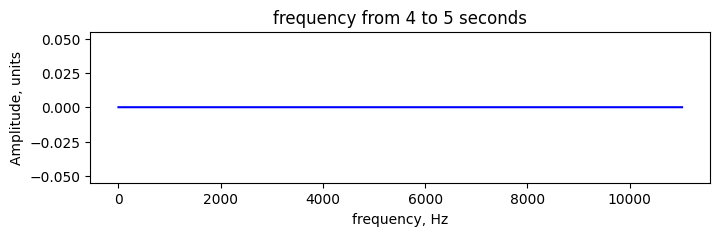



______________________________________________________________________________________________




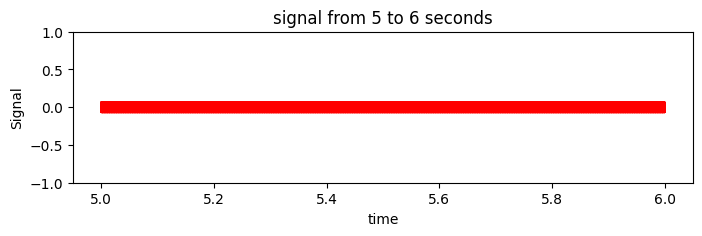

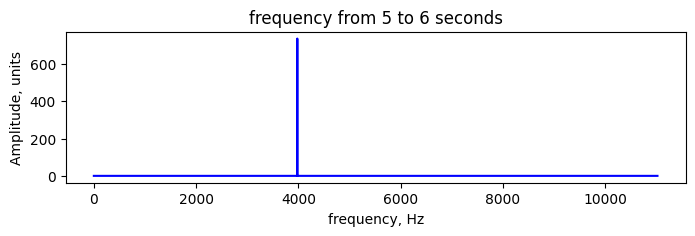



______________________________________________________________________________________________




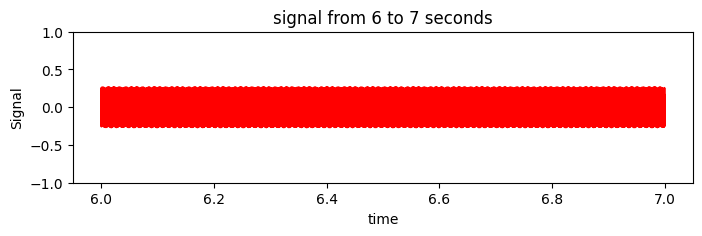

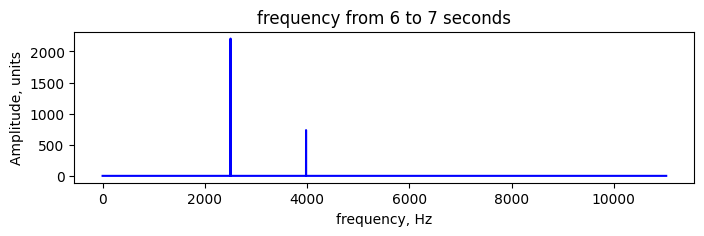



______________________________________________________________________________________________




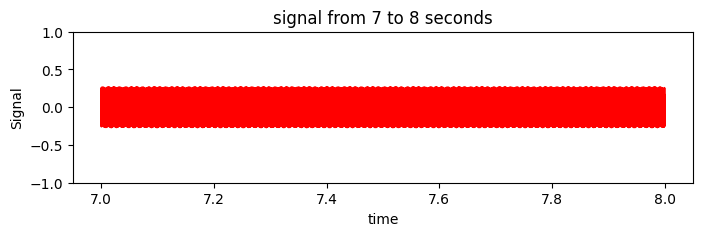

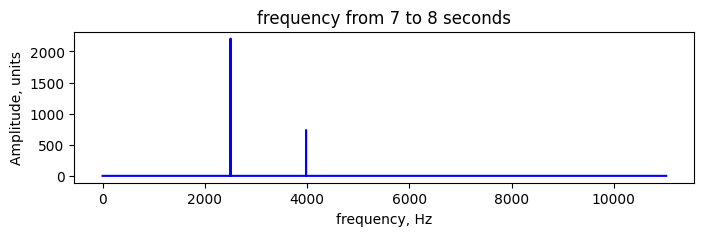



______________________________________________________________________________________________




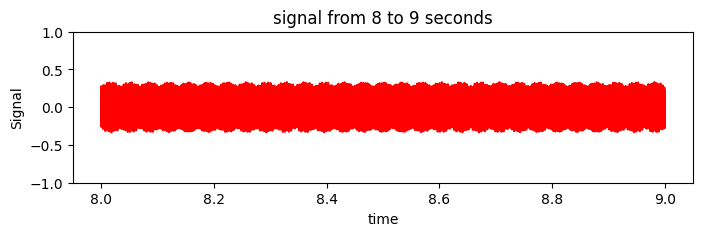

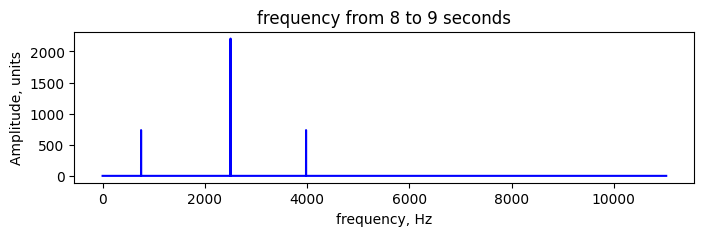



______________________________________________________________________________________________




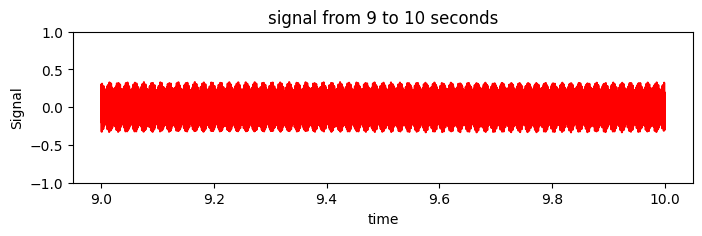

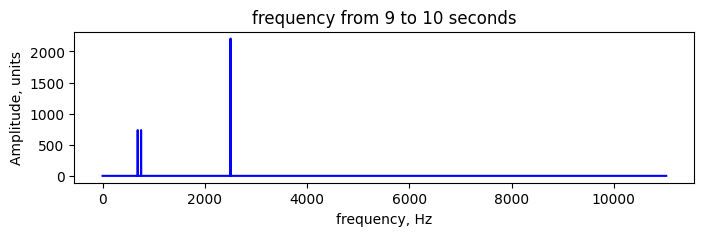



______________________________________________________________________________________________




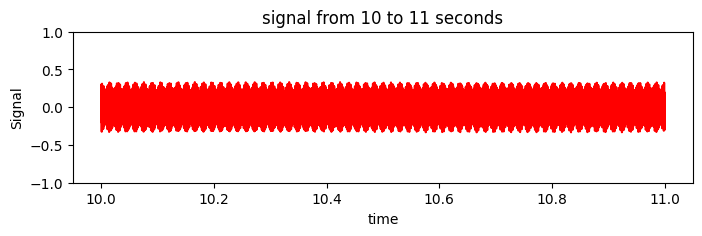

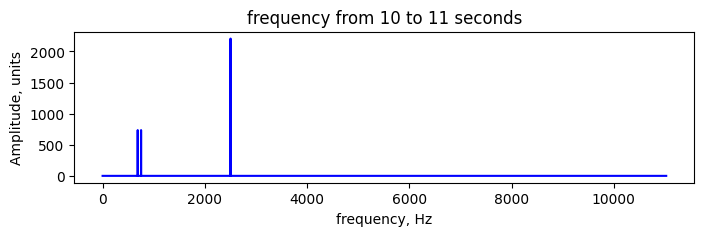



______________________________________________________________________________________________




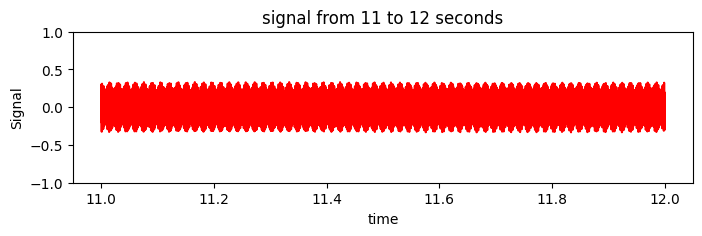

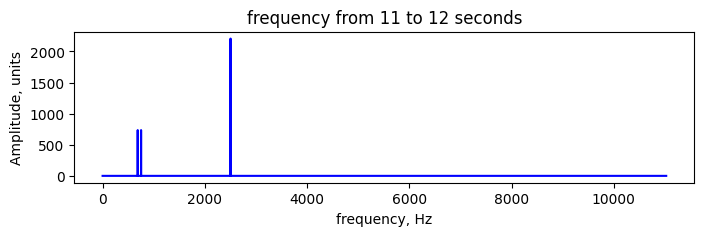



______________________________________________________________________________________________




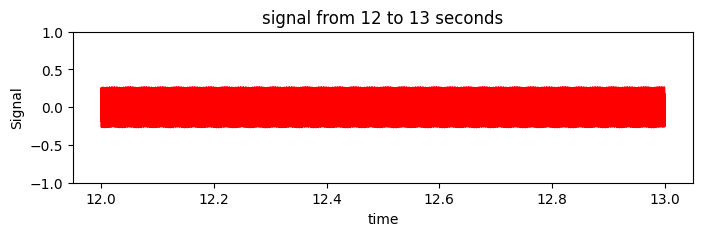

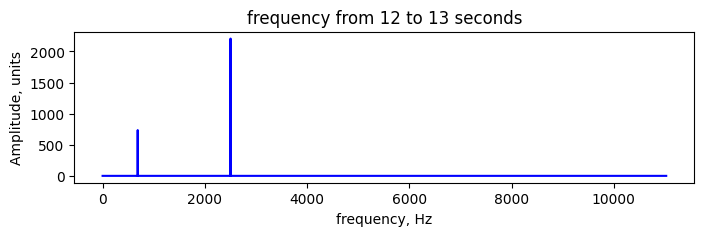



______________________________________________________________________________________________




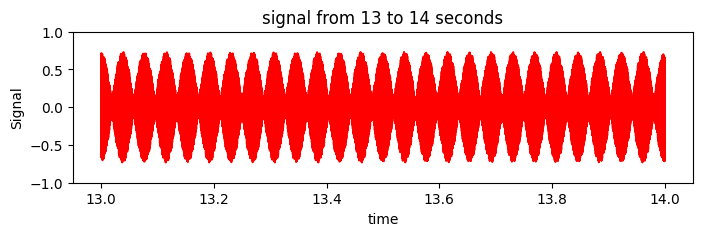

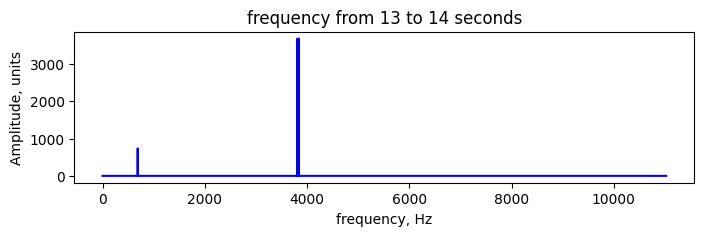



______________________________________________________________________________________________




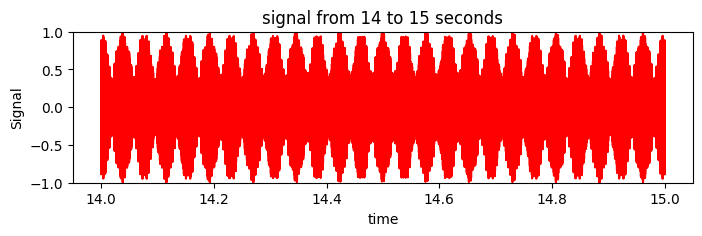

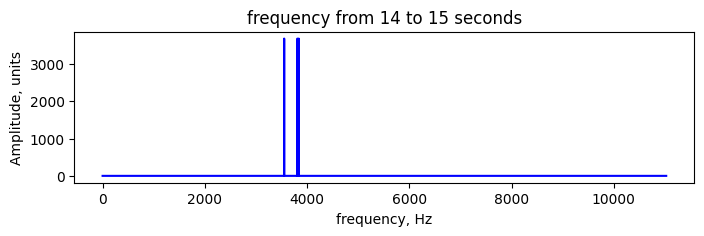



______________________________________________________________________________________________




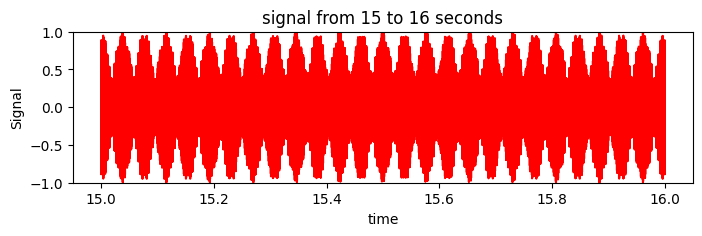

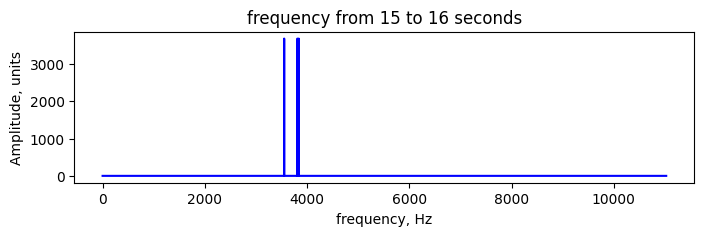



______________________________________________________________________________________________




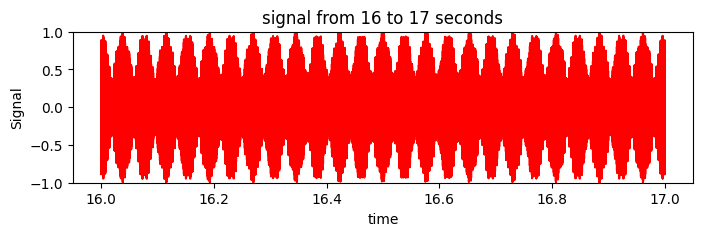

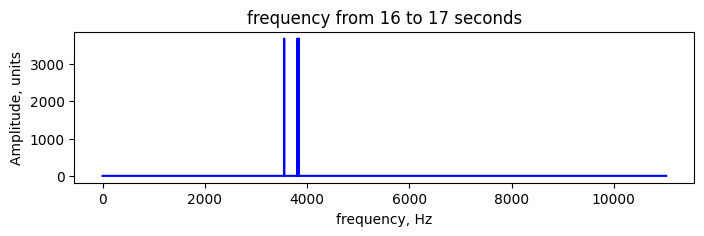



______________________________________________________________________________________________




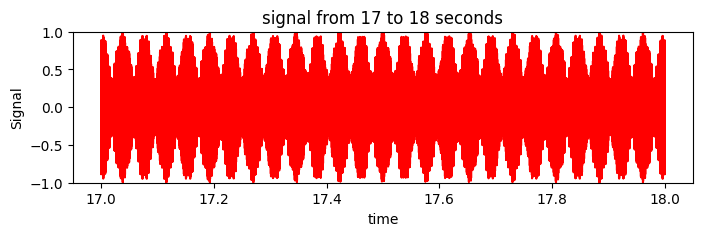

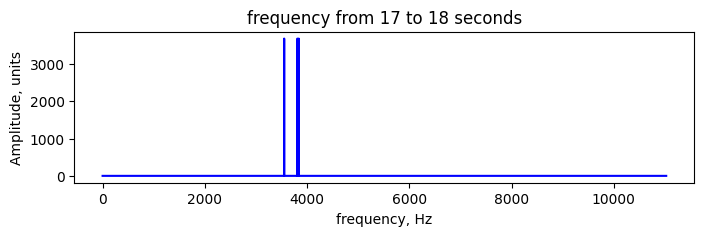



______________________________________________________________________________________________




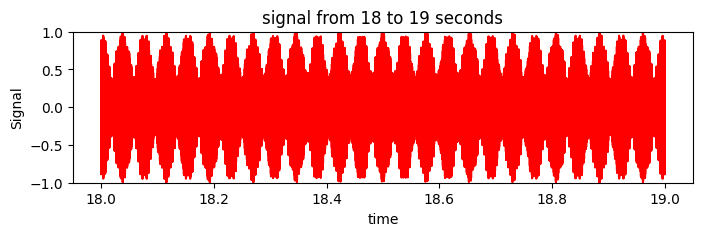

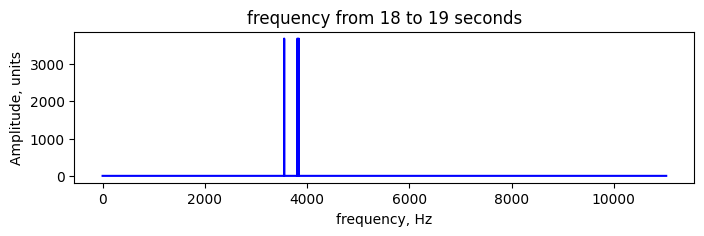



______________________________________________________________________________________________




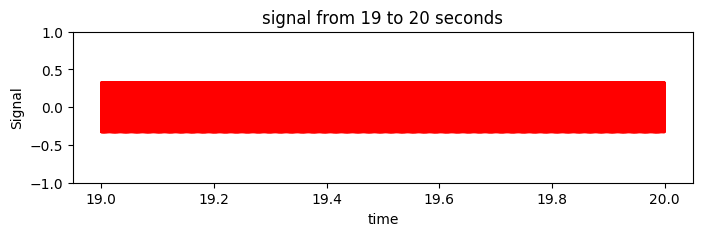

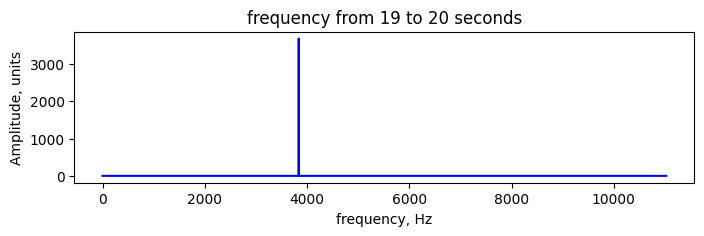



______________________________________________________________________________________________




In [18]:
for i in range(seconds):
  signal = y[sample_rate*i:sample_rate*(i+1)]

  plt.title(f"signal from {i} to {i+1} seconds")
  plt.plot(time[sample_rate*i:sample_rate*(i+1)], signal, 'r')
  plt.xlabel("time")
  plt.ylabel("Signal")
  plt.ylim([-1, 1])
  plt.show()

  fft_spectrum = np.fft.rfft(signal)
  freq = np.fft.rfftfreq(signal.size, d=1./sample_rate)
  plt.title(f"frequency from {i} to {i+1} seconds")
  plt.plot(freq, np.abs(fft_spectrum), 'b')
  plt.xlabel("frequency, Hz")
  plt.ylabel("Amplitude, units")
  plt.show()

  print('\n\n______________________________________________________________________________________________\n\n')

## Original vs Reconstructed Signal - Zoom in

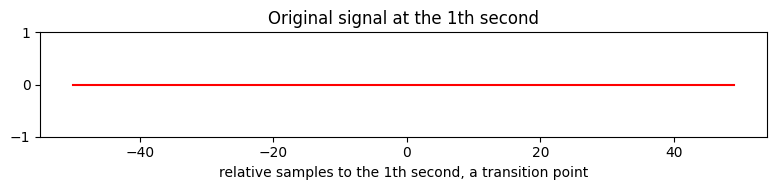

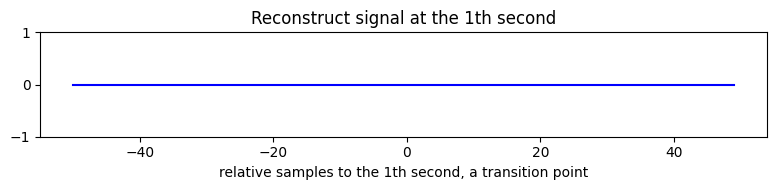



______________________________________________________________________________________________




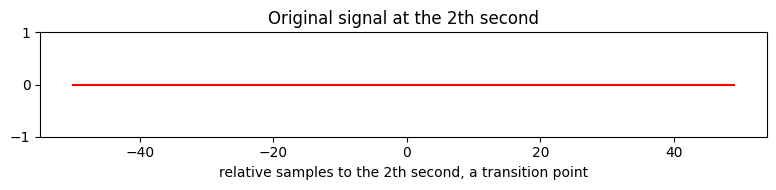

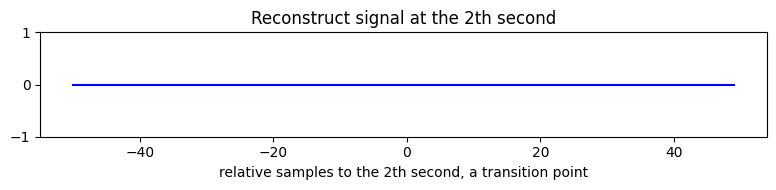



______________________________________________________________________________________________




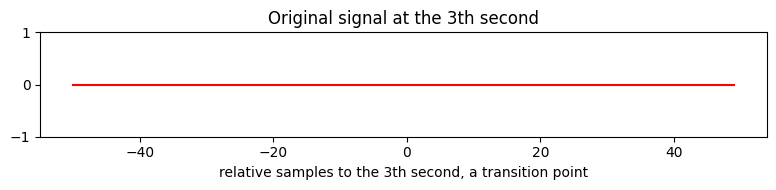

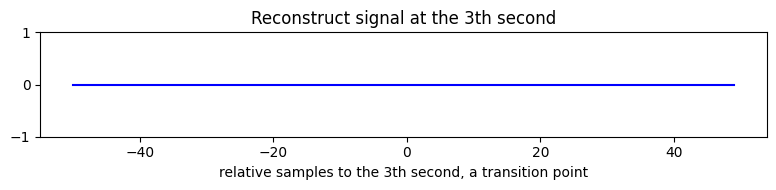



______________________________________________________________________________________________




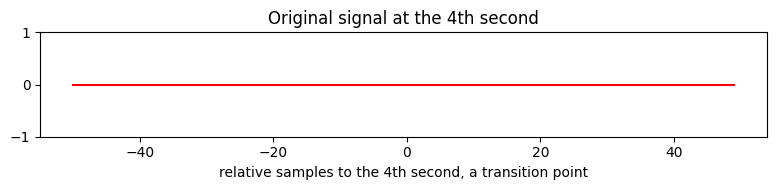

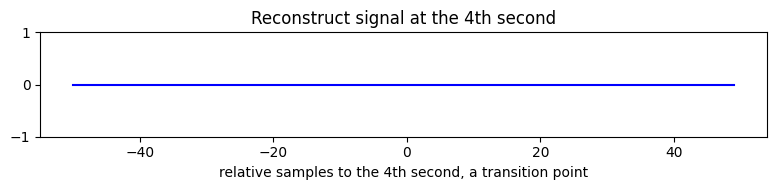



______________________________________________________________________________________________




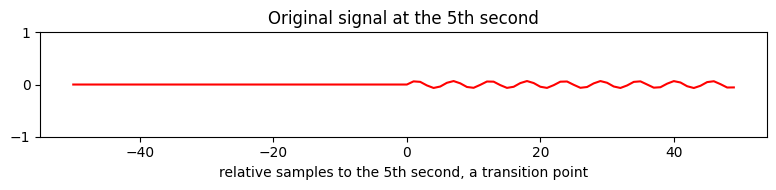

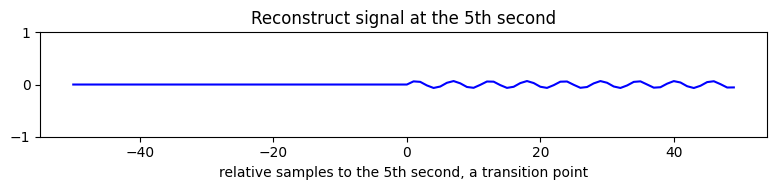



______________________________________________________________________________________________




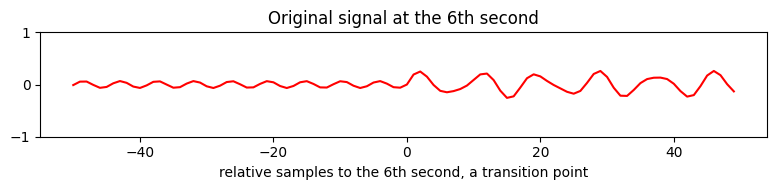

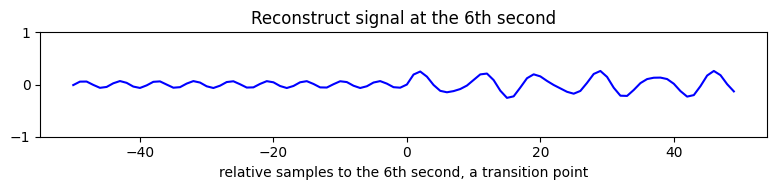



______________________________________________________________________________________________




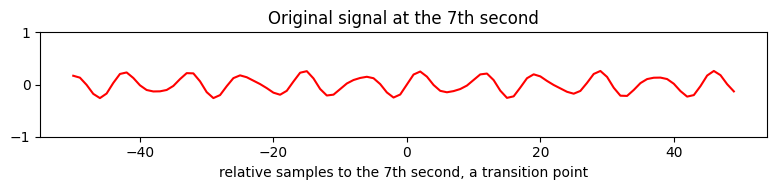

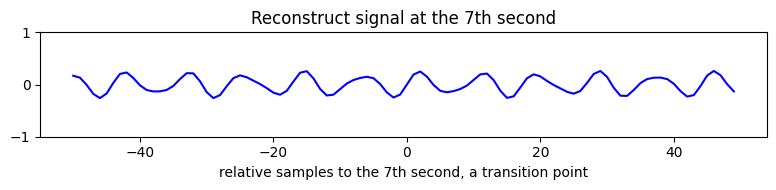



______________________________________________________________________________________________




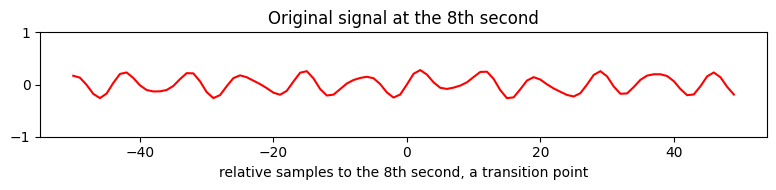

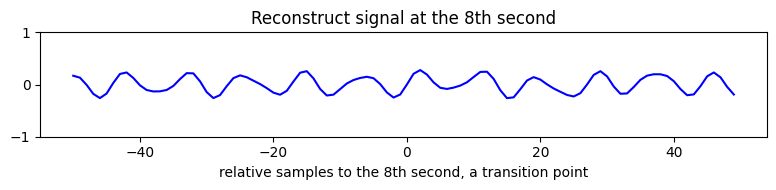



______________________________________________________________________________________________




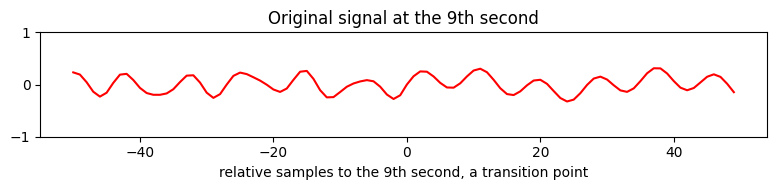

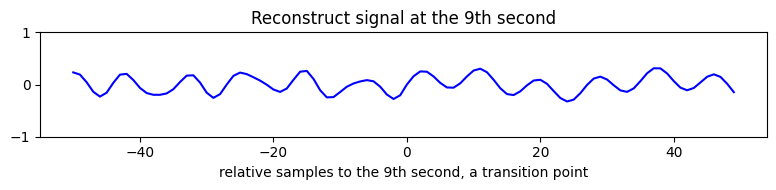



______________________________________________________________________________________________




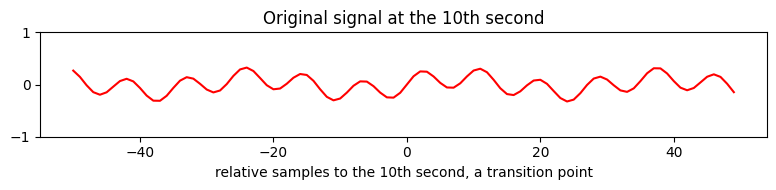

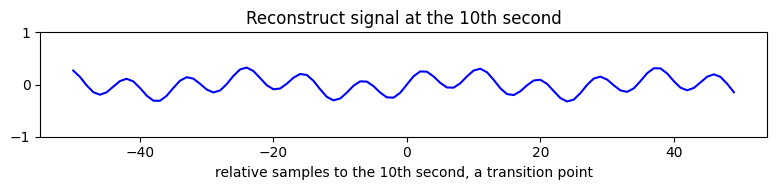



______________________________________________________________________________________________




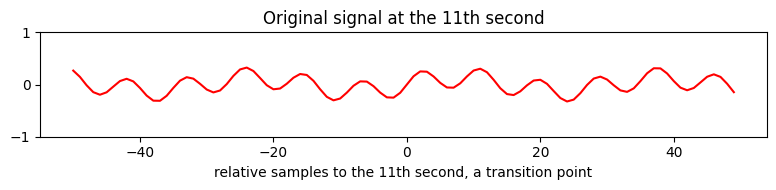

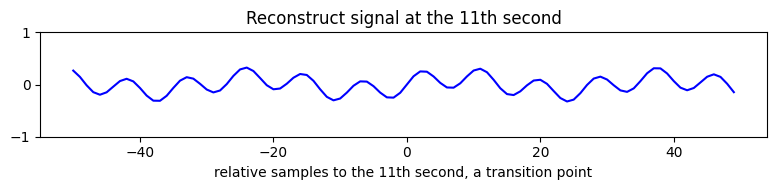



______________________________________________________________________________________________




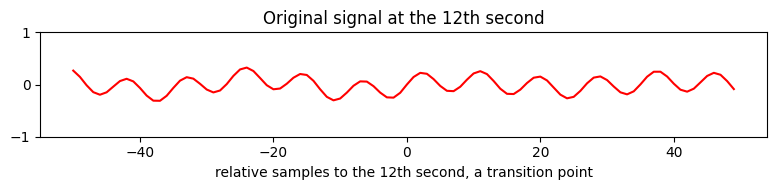

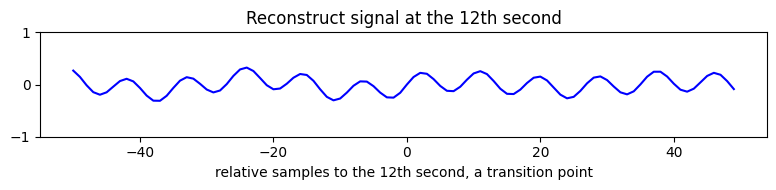



______________________________________________________________________________________________




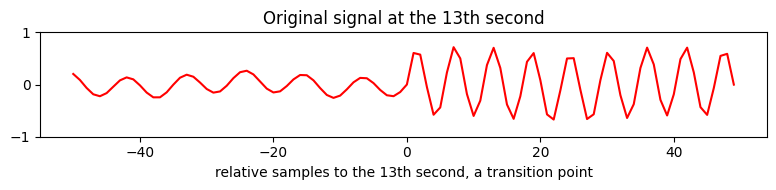

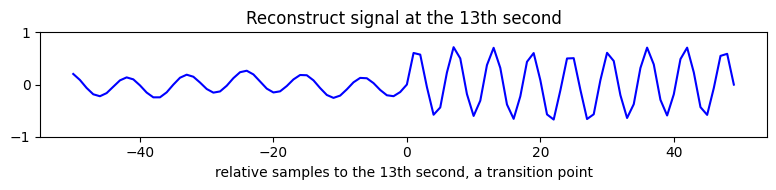



______________________________________________________________________________________________




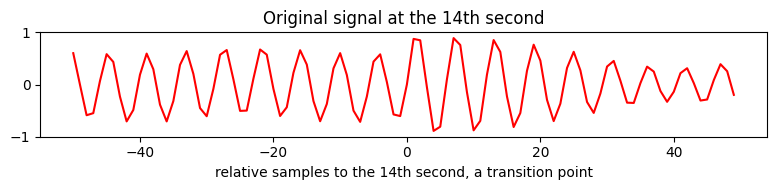

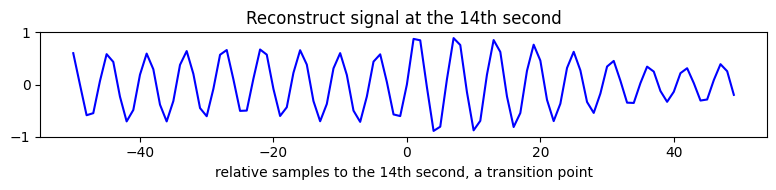



______________________________________________________________________________________________




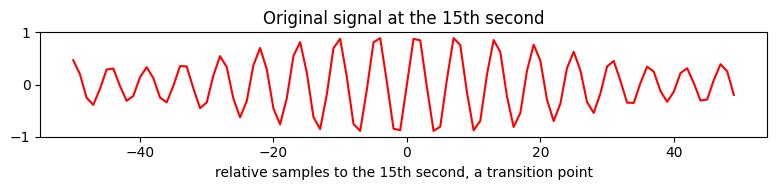

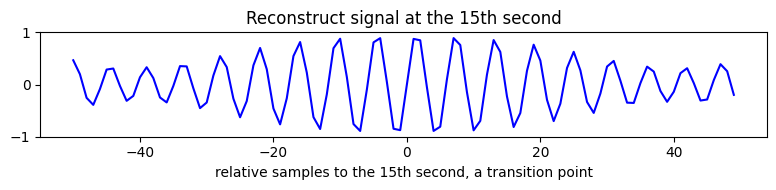



______________________________________________________________________________________________




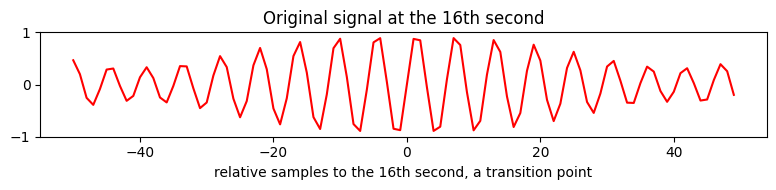

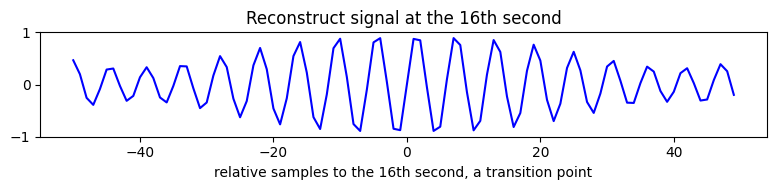



______________________________________________________________________________________________




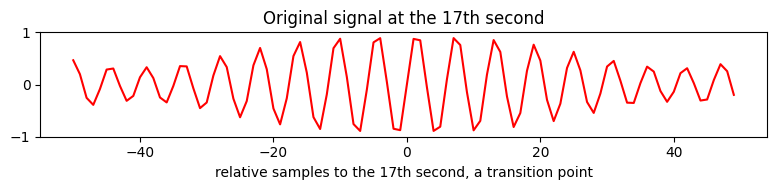

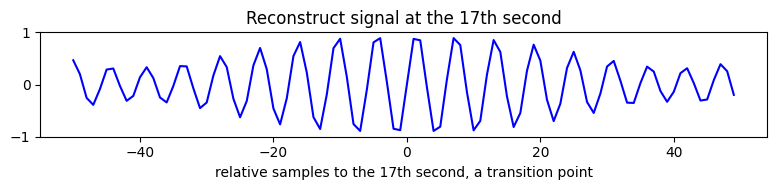



______________________________________________________________________________________________




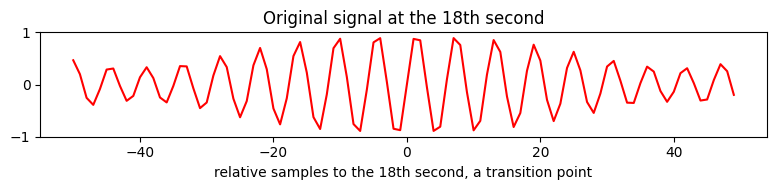

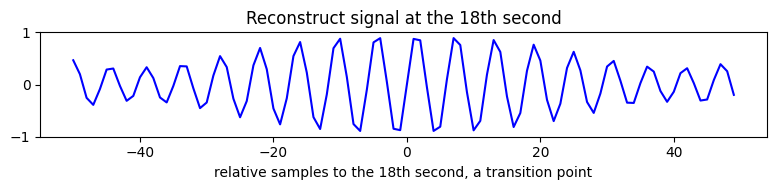



______________________________________________________________________________________________




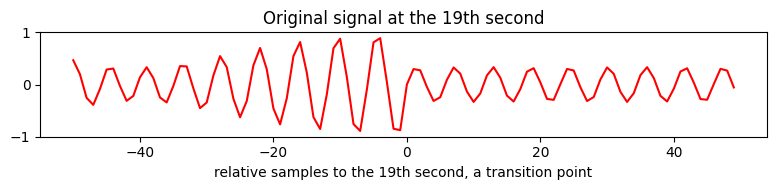

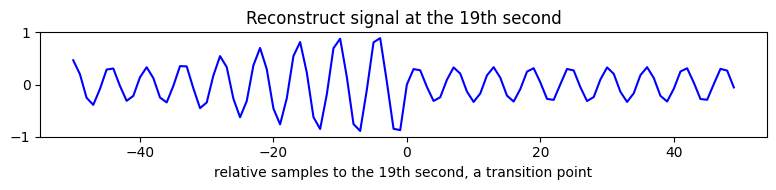



______________________________________________________________________________________________




In [19]:
wave_timing = range(-50,50)
for i in range(1,seconds):
  signal = y[sample_rate*i-50:sample_rate*(i)+50]
  plt.title(f"Original signal at the {i}th second")
  plt.plot(wave_timing, signal, 'r')
  plt.xlabel(f"relative samples to the {i}th second, a transition point")
  plt.ylim([-1, 1])
  plt.tight_layout()
  plt.show()

  signal = x[sample_rate*i-50:sample_rate*(i)+50]
  plt.title(f"Reconstruct signal at the {i}th second")
  plt.plot(wave_timing, signal, 'b')
  plt.xlabel(f"relative samples to the {i}th second, a transition point")
  plt.ylim([-1, 1])
  plt.tight_layout()
  plt.show()

  print('\n\n______________________________________________________________________________________________\n\n')

## Original vs Reconstructed Signal - Zoom out

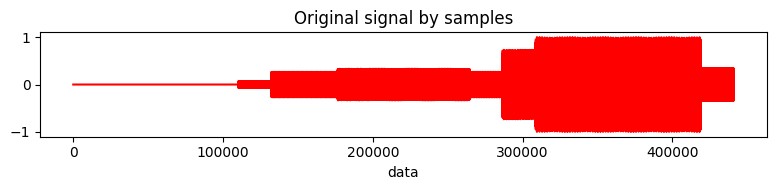

In [20]:
plt.title("Original signal by samples")
plt.plot(y[:], 'r')
plt.xlabel("data")
plt.tight_layout()
plt.show()

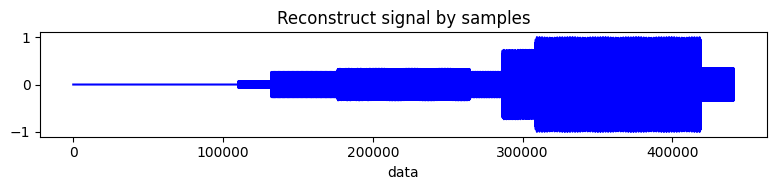

In [21]:
plt.title("Reconstruct signal by samples")
plt.plot(x[:], 'b')
plt.xlabel("data")
plt.tight_layout()
plt.show()

##### Question 4 [20 points]
Resample your file so that only three or four different frequencies remain. Resample down and then back up to the original sample rate.

Hint:
- https://librosa.org/doc/main/generated/librosa.resample.html 
- How can we see the frequencies? 
- What is the relationship between the sample rate and the maximum frequency detectable?

**We can see the frequencies by using fourier transformation as shown above. Regarding the relationship between the sample rate and the maximum frequency, theoretically the maximum frequency that can be represented is half the sample rate (known as the Nyquist frequency). In practice, the limit is a little lower.**

## Calculate current unique frequencies

In [22]:
frequencies = [list(item.keys()) for item in frequencies_amplitudes]
flat_frequencies = [item for sublist in frequencies for item in sublist if item != 0.0]
unique_freq = set(flat_frequencies)
unique_freq

{687.0, 753.0, 2503.0, 3552.0, 3811.0, 3837.0, 3980.0}

In [23]:
print(f'The original signal has {len(unique_freq)} unique frequencies')

The original signal has 7 unique frequencies


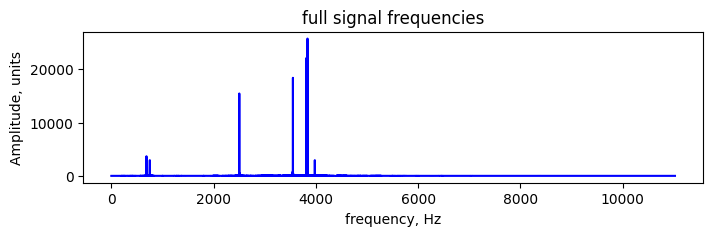

In [24]:
fft_spectrum = np.fft.rfft(y)
freq = np.fft.rfftfreq(y.size, d=1./sample_rate)
plt.title(f"full signal frequencies")
plt.plot(freq, np.abs(fft_spectrum), 'b')
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

## Resample down

In [25]:
sample_rate_resample = int(sample_rate/4)
sample_rate_resample

5512

In [26]:
y_resample = librosa.resample(y, orig_sr=sample_rate, target_sr=sample_rate_resample)

In [27]:
y_resample.shape[0]/20

5512.0

In [28]:
frequencies_amplitudes_resample = collect_amplitudes_frequencies(y_resample, sample_rate_resample)
frequencies_amplitudes_resample

[{0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {2503.0: 357.49786870957723},
 {2503.0: 357.640896324298},
 {753.0: 183.94020855205318, 2503.0: 357.64476257268325},
 {687.0: 183.94085882138603,
  753.0: 183.94097518081594,
  2503.0: 357.6261520436391},
 {687.0: 183.94069844369125,
  753.0: 183.94080701389922,
  2503.0: 357.63726822279034},
 {687.0: 183.9402375802779,
  753.0: 183.94030104171077,
  2503.0: 357.6336433715076},
 {687.0: 183.92441282665274, 2503.0: 357.41569077860737},
 {687.0: 183.96171709612048},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0}]

In [29]:
frequencies_resample = [list(item.keys()) for item in frequencies_amplitudes_resample]
flat_frequencies_resample = [item for sublist in frequencies_resample for item in sublist if item != 0.0]
unique_freq_resample = set(flat_frequencies_resample)
unique_freq_resample

{687.0, 753.0, 2503.0}

In [30]:
print(f'The resampled signal has {len(unique_freq_resample)} unique frequencies')

The resampled signal has 3 unique frequencies


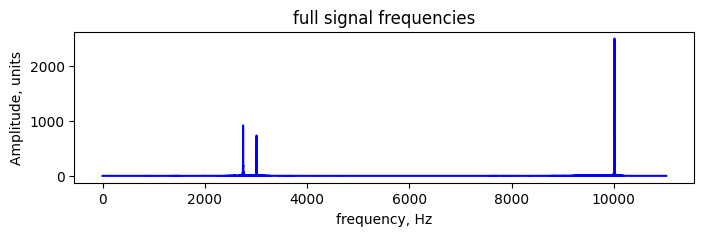

In [31]:
fft_spectrum = np.fft.rfft(y_resample)
freq = np.fft.rfftfreq(y_resample.size, d=1./sample_rate)
plt.title(f"full signal frequencies")
plt.plot(freq, np.abs(fft_spectrum), 'b')
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [32]:
max_resample_freq = np.max(list(unique_freq_resample))

In [33]:
max_freq_sr_ratio = max_resample_freq/sample_rate_resample
max_freq_sr_ratio

0.454100145137881

**As expected, in practice, the maximum frequency that can be represented is a little lower than half the sample rate.**

## Resample back

In [34]:
print(f'The resampled signal (resample down) has {len(unique_freq_resample)} unique frequencies')

The resampled signal (resample down) has 3 unique frequencies


In [35]:
y_resample_back = librosa.resample(y_resample, orig_sr=sample_rate_resample, target_sr=sample_rate)

In [36]:
y_resample_back.shape[0]/20

22050.0

In [37]:
frequencies_amplitudes_resample_back = collect_amplitudes_frequencies(y_resample_back, sample_rate)
frequencies_amplitudes_resample_back

[{0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {2503.0: 935.5293533510373},
 {2503.0: 935.2673003673057},
 {753.0: 735.8326123043859, 2503.0: 935.3087498543484},
 {687.0: 735.8264272558896,
  753.0: 735.8263442009636,
  2503.0: 935.1756566870644},
 {687.0: 735.829664012631, 753.0: 735.82995195322, 2503.0: 935.2505580363983},
 {687.0: 735.8285328919054,
  753.0: 735.8287003298052,
  2503.0: 935.2338251668158},
 {687.0: 735.7644031804514, 2503.0: 934.8952199855819},
 {687.0: 735.8859791859493},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0},
 {0.0: 0.0}]

In [38]:
frequencies_resample_back = [list(item.keys()) for item in frequencies_amplitudes_resample_back]
flat_frequencies_resample_back = [item for sublist in frequencies_resample_back for item in sublist if item != 0.0]
unique_freq_resample_back = set(flat_frequencies_resample_back)
unique_freq_resample_back

{687.0, 753.0, 2503.0}

In [39]:
print(f'The resampled signal (resample back) has {len(unique_freq_resample_back)} unique frequencies')

The resampled signal (resample back) has 3 unique frequencies


##### Question 5 [20 points]
Generate phase for your file using GriffinLim.
Show the following:
- Your waveform after stft and then istft
- Your waveform after 0 iteration of GL
- Your waveform after GL
- The difference between the original and the 0 iter version
- The difference between the original and the GM version
- The difference between the original and the stft-istft version
 - Note that doing STFT and back looses some information so you may need to crop your original vector to match the sizes

Hint:
- https://librosa.org/doc/main/generated/librosa.griffinlim.html
- How can we see the frequencies? 
- What is the relationship between the sample rate and the maximum frequency detectable?

In [40]:
n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, size=n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft)
y_istft = librosa.istft(D, length=n)

In [41]:
S = np.abs(librosa.stft(y))
y_gl_0_iter = librosa.griffinlim(S, n_iter=0)
y_gl = librosa.griffinlim(S)

## Original Waveform

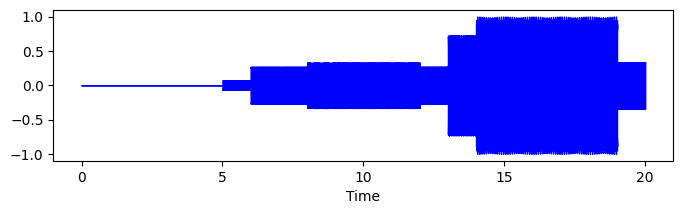

In [42]:
librosa.display.waveshow(y, sr=sample_rate, color='b')

In [43]:
Audio(data=y,rate=sample_rate)

## GriffinLim 0 iter Waveform

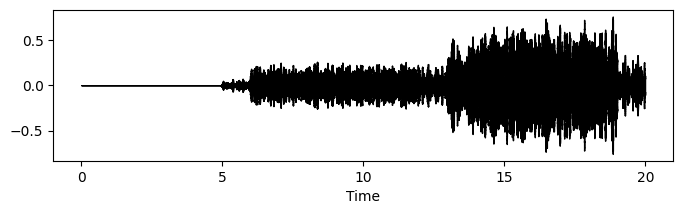

In [44]:
librosa.display.waveshow(y_gl_0_iter, sr=sample_rate, color='black')

In [45]:
Audio(data=y_gl_0_iter,rate=sample_rate)

## GriffinLim Waveform

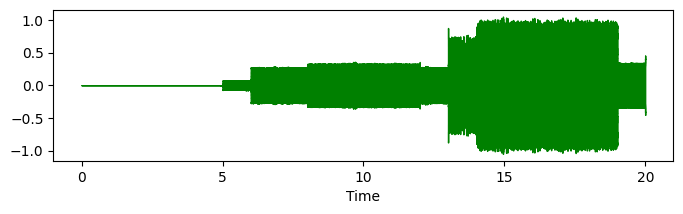

In [46]:
librosa.display.waveshow(y_gl, sr=sample_rate, color='g')

In [47]:
Audio(data=y_gl,rate=sample_rate)

## Perfect Reconstruction Waveform

In [48]:
diff_original_perfect = np.abs(y - y_istft)
np.max(diff_original_perfect)

1.7881393e-07

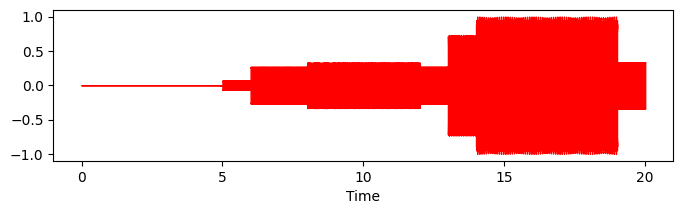

In [49]:
librosa.display.waveshow(y_istft, sr=sample_rate, color='r')

In [50]:
Audio(data=y_istft,rate=sample_rate)

## Difference between original to GL 0 iter reconstruction waveforms

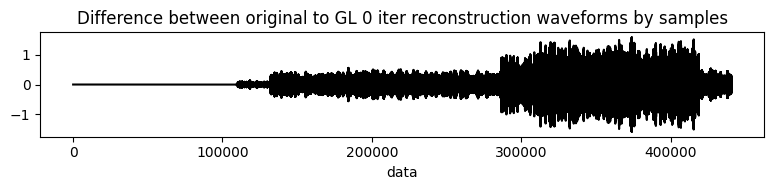

In [51]:
diff_original_gl_0_iter = y[:y_gl_0_iter.shape[0]] - y_gl_0_iter

plt.title("Difference between original to GL 0 iter reconstruction waveforms by samples")
plt.plot(diff_original_gl_0_iter[:], 'black')
plt.xlabel("data")
plt.tight_layout()
plt.show()

## Difference between original to GL reconstruction waveforms



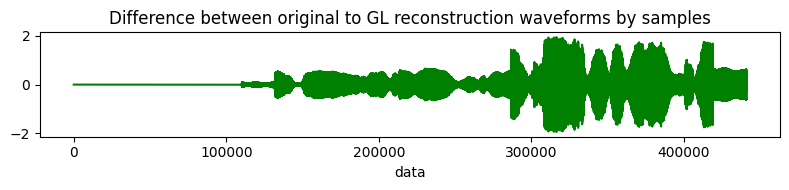

In [52]:
diff_original_gl = y[:y_gl.shape[0]] - y_gl

plt.title("Difference between original to GL reconstruction waveforms by samples")
plt.plot(diff_original_gl[:], 'g')
plt.xlabel("data")
plt.tight_layout()
plt.show()

## Difference between original to perfect reconstruction waveforms

In [53]:
diff_original_perfect = y - y_istft
np.max(np.abs(diff_original_perfect))

1.7881393e-07

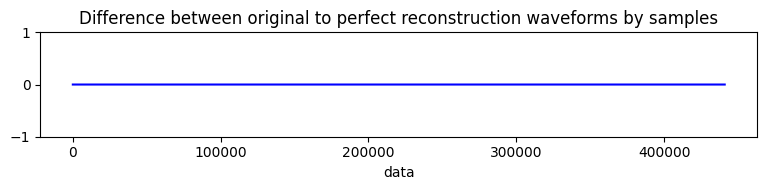

In [54]:
plt.title("Difference between original to perfect reconstruction waveforms by samples")
plt.plot(diff_original_perfect[:], 'b')
plt.xlabel("data")
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

##### Question 6 [10 points]

Describe the difference between the Griffith & Lim and the perfect reconstruction. Does it sound similar? Can you see the difference in the waveform?

**GriffithLim algorithm randomly initializes phase estimates, and then alternates forward- and inverse-STFT operations. Perfect reconstruction algorithm using istft, minimizing the mean squared error between stft_matrix and STFT of y.**

**In our work, GriffithLim reconstruction overall sound very similar to the perfect reconstruction and the original audio, and it is hard to ear much difference. Yet, when comparing their waveforms, we can see a big difference. The perfect reconstruction waveform looks very similar to the original waveform, and indeed the difference between these signals is negligible. However, GL approximate the phase, and when we're taking the difference between the GL reconstruction to the original signal we can definitely see the difference.**